# Построение графиков с помощью matplotlib

[К оглавлению](00_contents.ipynb)

Основная графическая библиотека Python - `matplotlib`. Подпакет `pyplot` в этой библиотеке содержит простые функции для построения графиков, похожие на аналогичные функции в Matlab.

[Введение в pyplot на сайте разработчиков](http://matplotlib.org/users/pyplot_tutorial.html)

## Подключение пакета

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 
#графики встраиваются в блокнот;

Можно использовать следующие способы отображения графиков:

`%matplotlib inline` - в блокноте, в виде статичного изображения

`%matplotlib notebook` - в блокноте, в возможностью масштабирования

`%matplotlib`  - в отдельном окне

## Выбор формата графиков

При необходимости, можно переключить формат, в котором выводятся графики. Векторные форматы позволяют сохранить качество при масштабировании и печати, но требуют больше ресурсов. По умолчанию используется растровый формат png. 

Про отличия векторной и растровой графики можно почитать [тут](https://turbologo.ru/blog/rastr-i-vector/)

In [4]:
%config InlineBackend.figure_format = 'svg' #векторный формат

## Линейные графики и диаграммы рассеяния

Графики в Matplotlib строятся по точкам. Координаты точек хранятся в массивах numpy.

In [6]:
import numpy as np
x = np.linspace(-10, 10, 20)
y = x**2

Для вывода линейных графиков и диаграмм рассеяния используется функция `plot()`

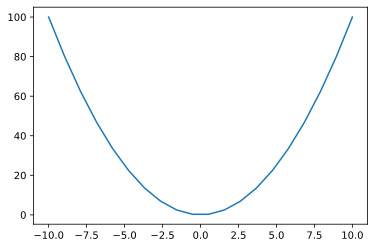

In [7]:
plt.plot(x, y);

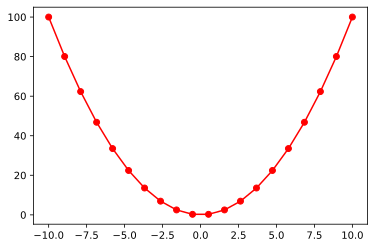

In [8]:
# Сокращенная форма для указания параметров графика
plt.plot(x, y, 'ro-'); #изменение цвета и типа линии и маркера - см. подсказку по Shift-Tab;

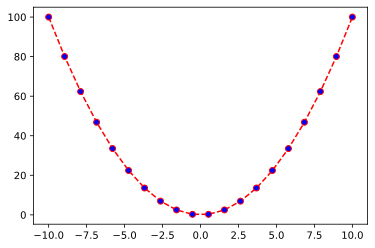

In [9]:
plt.plot(x, y, color='red', marker='o', linestyle='--', markerfacecolor='blue');

## Оформление графиков
В ячейке блокнота можно несколько раз вызывать функцию `plot()` для нанесения нескольких линий на график. Также можно использовать различные функции для форматирования графика и добавления легенды.

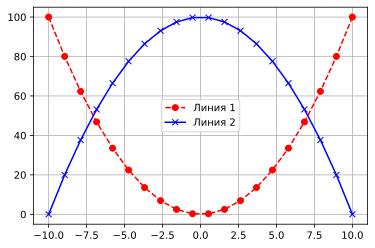

In [10]:
# Полная форма указания параметров графика
plt.plot(x, y, color='red', marker='o', linestyle='--', label='Линия 1')
plt.plot(x, -y + 100, color='blue', marker='x', label='Линия 2')
plt.grid() # сетка
plt.legend(loc='best');

см. также [Примеры размещения легенды графика](http://matplotlib.org/users/legend_guide.html)

С помощью функций `xlabel()`, `ylabel()` можно подписать координатные оси. Заглавие графика можно задать с помощью функции `title()`. 

В названия и аннотации можно включать математические символы и формулы, используя $\LaTeX$. Чтобы не возникало ошибок из-за специальных символов, используемых для набора формул, нужно добавлять символ `r` перед строкой с формулой, например: `r'$\alpha$'`.

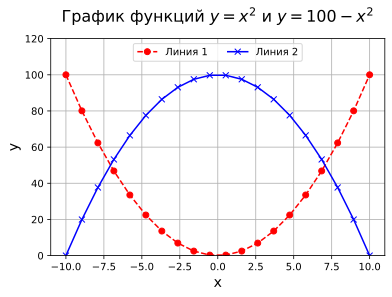

In [11]:
plt.plot(x, y, color='red', marker='o', linestyle='--', label='Линия 1')
plt.plot(x, -y + 100, color='blue', marker='x', label='Линия 2')
plt.legend(loc='upper center', ncol=2)
plt.grid()

#Подписи для осей:
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

#Диапазон оси y:
plt.ylim(0, 120)

#Заголовок:
plt.title(r'График функций $y = x ^2 $ и $y = 100 - x^2$', fontsize=16, y=1.05);

## Аннотирование графиков

Текстовые пояснения на графиках можно выводить с помощью функции `text()`.
Функция `annotate()` позволяет создавать более сложные аннотации, например, со стрелками, указывающими на определенную область графика.
Горизонтальные и вертикальные опорные линии можно строить с помощью функций `axhline()`, `axvline()`.

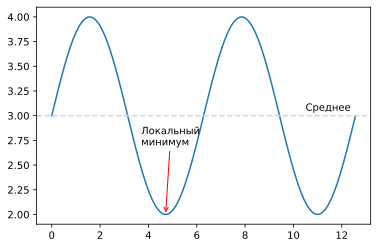

In [12]:
t = np.linspace(0., 4 * np.pi, 101)
f = np.sin(t) + 3
plt.plot(t,f)

plt.axhline(3,color='lightgray',linestyle='--')
plt.text(10.5, 3.05, 'Среднее')
plt.annotate('Локальный\nминимум', xy=(3 * np.pi / 2, 2), 
             xytext=(3.7, 2.7), 
             arrowprops=dict(arrowstyle='->', color='red'));

[Руководство по аннотированию графиков](http://matplotlib.org/users/annotations_guide.html)

## Дополнительные ресурсы

- Галерея matplotlib http://matplotlib.org/gallery.html
- Python scientific lecture notes https://scipy-lectures.github.io/


Примеры кода из Интернет можно загружать с помощью волшебной команды `%load`

Пусть, необходимо построить график, похожий на такой:  
![Полярный график](http://matplotlib.org/mpl_examples/pie_and_polar_charts/polar_bar_demo.png)
http://matplotlib.org/examples/pie_and_polar_charts/polar_bar_demo.html


Для получения шаблона кода достаточно скопировать ссылку на исходный код (.py) на странице примера и указать эту ссылку в команде `%load`: